### This notebook relates to the implementation of a SQL-like language

#### This is an example of output
~~~yaml
FIND_EVENT from event , date , description
FIND_EVENT where fullDate = " 28 / 7 / 2017 " AND felling = 1 AND event.dateID = date.dataID AND event.descriptionID = description.descriptionID
FIND_EVENT select title [ word ]

COUNT_WORDS from FIND_EVENT
COUNT_WORDS select REGEXP_SPLIT_TO_TABLE( word , ' ' ) [ word_tokenized ] , COUNT( * ) [ number ]
COUNT_WORDS function REGEXP_SPLIT_TO_TABLE( word , '  ' )
COUNT_WORDS group_by word_tokenized

main  from COUNT_WORDS
main  select word_tokenized , number
main  plotlist word_tokenized , number
main  visualize vbar
~~~


### Mapping

In [1]:
transformed_sql = """FIND_EVENT from event , date , description
FIND_EVENT where fullDate = " 28 / 7 / 2017 " AND felling = 1 AND event.dateID = date.dataID AND event.descriptionID = description.descriptionID
FIND_EVENT select title [ word ]

COUNT_WORDS from FIND_EVENT
COUNT_WORDS select REGEXP_SPLIT_TO_TABLE( word , ' ' ) [ word_tokenized ] , COUNT( * ) [ number ]
COUNT_WORDS function REGEXP_SPLIT_TO_TABLE( word , '  ' )
COUNT_WORDS group_by word_tokenized

main  from COUNT_WORDS
main  select word_tokenized , number
main  plotlist word_tokenized , number
main  visualize vbar
"""

In [2]:
rows = transformed_sql.split("\n") 

for row in rows:
    print(row.split(" "))

['FIND_EVENT', 'from', 'event', ',', 'date', ',', 'description']
['FIND_EVENT', 'where', 'fullDate', '=', '"', '28', '/', '7', '/', '2017', '"', 'AND', 'felling', '=', '1', 'AND', 'event.dateID', '=', 'date.dataID', 'AND', 'event.descriptionID', '=', 'description.descriptionID']
['FIND_EVENT', 'select', 'title', '[', 'word', ']']
['']
['COUNT_WORDS', 'from', 'FIND_EVENT']
['COUNT_WORDS', 'select', 'REGEXP_SPLIT_TO_TABLE(', 'word', ',', "'", "'", ')', '[', 'word_tokenized', ']', ',', 'COUNT(', '*', ')', '[', 'number', ']']
['COUNT_WORDS', 'function', 'REGEXP_SPLIT_TO_TABLE(', 'word', ',', "'", '', "'", ')']
['COUNT_WORDS', 'group_by', 'word_tokenized']
['']
['main', '', 'from', 'COUNT_WORDS']
['main', '', 'select', 'word_tokenized', ',', 'number']
['main', '', 'plotlist', 'word_tokenized', ',', 'number']
['main', '', 'visualize', 'vbar']
['']


### VISUALIZE

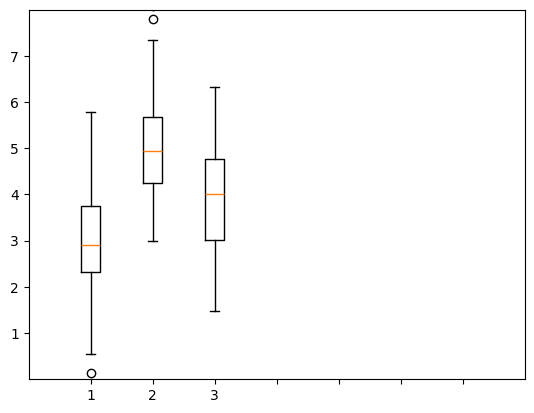

In [3]:
import matplotlib.pyplot as plt
import numpy as np

D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# plot
fig, ax = plt.subplots()
VP = ax.boxplot(D, bootstrap=1)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [4]:
import pandas as pd
import numpy as np

# Generate a random DataFrame for testing
np.random.seed(42)  # Ensures reproducibility

# Create a DataFrame with random data
test_df = pd.DataFrame({
    "ID": np.arange(1, 21),  # Unique identifiers
    "Name": [f"Sample_{i}" for i in range(1, 21)],
    "Age": np.random.randint(18, 60, size=20),  # Random ages between 18 and 60
    "Score": np.random.uniform(0, 100, size=20).round(2),  # Random scores rounded to 2 decimal places
    "Status": np.random.choice(["Active", "Inactive"], size=20)  # Random status
})

print(type(test_df['Name']))


<class 'pandas.core.series.Series'>


In [5]:
# LINEPLOT

def lineplot(x, y, **kwargs):
    """ 
    Plot y or multiples y vs x in a line/markers
    
    x: X-axis values
    y: Y-axis values. If contains multiple arrays (e.g [[1,2,3],[3,2,1]]), every array will represent a new Y-axis.
    label: Label of each line
    linestyle: The style of the lines (default is '-', others are '--, '-.' and etc.)
    color: Color of the line.
    marker: Enables markers ('o', 's', '^', etc.).
    """

    try:
        fig, ax = plt.subplots()

        for index,new_line in enumerate(y):
                ax.plot(x,new_line,**kwargs)
        if 'label' in kwargs:
             fig.legend(kwargs['label'])

        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

True

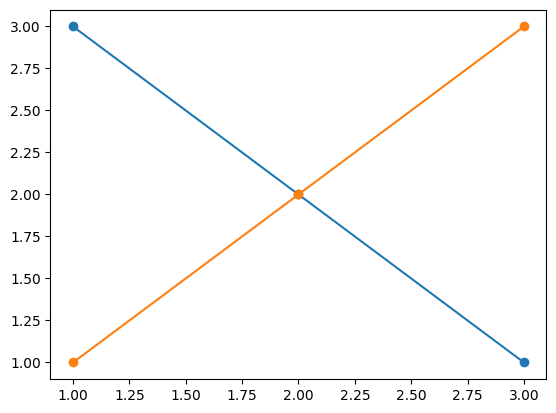

In [6]:
lineplot([1,2,3],[[3,2,1],[1,2,3]],marker='o')

/tmp/ipykernel_5056/3934020107.py:19: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  ax.plot(x,new_line,**kwargs)


True

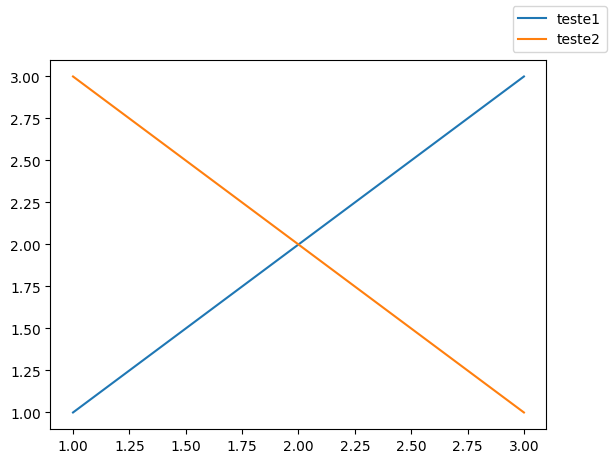

In [7]:
lineplot([1,2,3],[[1,2,3],[3,2,1]],label=['teste1','teste2'])

In [8]:
# VERTICAL BAR

def vbar(x, y, **kwargs):
    """ 
    Plot a vertical bar and saves the result into a png.

    x: Values on the X-axis.
    y: Height of the bars. If it contains more than one array, it indicates a stacked bar.
    color: Fill color of the bars.
    label: Label for the legend of the bars.
    """
    try:
        fig, ax = plt.subplots()

        for new_line in y:
                ax.bar(x, new_line, **kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

True

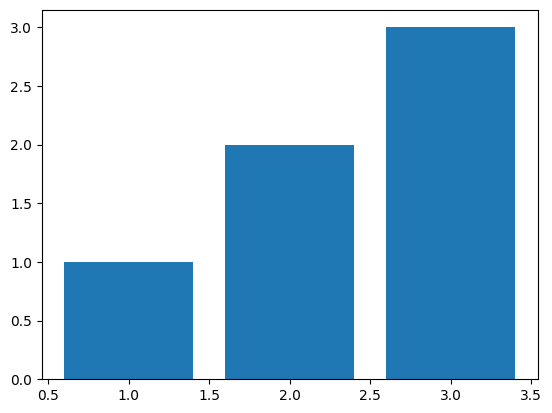

In [9]:
vbar([1,2,3],[[1,2,3]])

In [10]:
# HORIZONTAL BAR

def barh(y, x, **kwargs):
    """ 

    Plot a horizontal bar and saves the result into a png.

    y: Values on the Y-axis.
    x: Height of the bars. If it contains more than one array, it indicates a stacked bar.
    color: Fill color of the bars.
    label: Label for the legend of the bars.
    """
    try:
        fig, ax = plt.subplots()

        for new_line in x:
                ax.barh(y, new_line, **kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

In [11]:
# SCATTER

def scatter(x,y, **kwargs):
    """ 
    Plot a scatter X vs Y and saves the result into a png.

    x: Values on the X-axis.
    y: Values on the Y-axis.
    """
    try:
        fig, ax = plt.subplots()
        ax.scatter(x, y, **kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

In [12]:
# PIE

def pie(x,labels, **kwargs):
    """ 
    Plots a pie chart and saves the result into a png.

    x: Sequence of values (proportions or frequencies).
    labels: Labels for the slices.
    colors: Colors for each slice.
    """
    try:
        fig, ax = plt.subplots()
        ax.pie(x,labels=labels, **kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

In [13]:
# BOXPLOT

def boxplot(x,labels, **kwargs):
    """ 
    Generates a boxplot and saves the result into a png.

    data: Data to plot (list or array).
    bootstrap: Whether to use bootstrap or not.
    tick_labels: Labels for the data groups.
    """
    try:
        fig, ax = plt.subplots()
        ax.boxplot(x,labels=labels, **kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

In [14]:
# HEATMAP

def heatmap(data, **kwargs):
    """ 
    Plots a heatmap and saves it as a png.

    data: 2D matrix of values to create the heatmap.
    cmap: Color map. It is defined as an integer but should be mapped to one of the color groups: 'viridis', 'hot', 'coolwarm'.
    """
    try:
        fig, ax = plt.subplots()
        ax.imshow(data,**kwargs)
        fig.savefig("./figure.png")

    except Exception as e:
        print(e)
        return e
    
    return True

In [15]:
# WORDCLOUD

from wordcloud import WordCloud


def wordcloud(data,columnName):
    """
    Plots a wordcloud using WordCloud lib and saves it as a png.

    data: column containing the phrases to be used
    columnName: the name of the column used
    """

    def clean_words(word):
        """ 
        this is responsible for cleaning
        """
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace("'s","")
        word = word.replace("'s","")
        
        return word.lower()

    # split words
    words = data.apply(lambda row: row.split(" "))
    words = words.explode(columnName)

    # clean
    words = words.apply(lambda row: clean_words(row))

    # join in string 
    words = " ".join(words['title'].tolist())

    # generating the wordcloud

    wordcloud = WordCloud(background_color="white").generate(words)
    fig, ax = plt.subplots()
    ax.imshow(wordcloud)
    fig.savefig("./figure.png")
    
    return True


## Machine Learning

TODO 

Pre processing

[x] Removing null
[] Data scaling
[x] Formatar datas
[] ?

Methods

[x] Decision Tree
[x] Regressão Linear
[] KNN
[x] Kmeans
[x] DBScan


#### Pre processing tasks

In [16]:
# Null values

def remove_null(df: pd.DataFrame):
    """ 
    This function will drop null values from a dataframe and reset the index
    """
    return df.dropna(axis='index',ignore_index=True)

In [17]:
# Data scaling

def data_scaling(df: pd.DataFrame):
    """ 
    This function will normalize the DataFrame between 0 and 1 using MinMaxScaler
    """
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler.fit_transform(df)

In [18]:
# Data Encoding

def data_encoding(df: pd.DataFrame):
    """ 
    This function will turn categorical values into numeric values using OneHotEncoder.

    This is required by some classifiers.
    """
    from sklearn.preprocessing import OneHotEncoder

    onehot_encoder = OneHotEncoder()
    return onehot_encoder.fit_transform(df)

In [19]:
# Date formatting

from dateutil.parser import parse

def date_formater(date: str):
    """ 
    This function will check for the date format and transform it to our framework format ISO '' 
    """
    
    date_object = parse(date)
    iso_format = date_object.strftime('%Y-%m-%d') # TODO check this

    return iso_format

In [20]:
# Text Embbedding

def generate_text_embedding(text: str):
    """ 
    This will use a XX model to generate text embbedings

    The model used is avalabiel at https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
    """
    from sentence_transformers import SentenceTransformer

    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2') # Change this to local model later
    embeddings = model.encode(text)
    return embeddings

print(generate_text_embedding("Hello There Mate"))

/home/felipe/code/masters/event_mining/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[-8.48223045e-02  6.26678914e-02  6.13091774e-02  4.17669937e-02
 -6.41883351e-03 -8.40054899e-02  3.07642780e-02  8.33320022e-02
  9.98061057e-03 -3.26609910e-02  4.67301300e-03 -4.06564511e-02
 -3.32189314e-02 -6.15481893e-03 -9.43227392e-03  1.32911690e-02
  2.39657443e-02 -4.35296632e-02 -5.09595349e-02  2.84626149e-02
 -1.04090218e-02  3.90152596e-02 -6.42029271e-02 -4.84137842e-03
 -4.94682007e-02 -3.70830595e-02  4.04389240e-02  4.59679365e-02
  3.68867273e-04 -2.45583393e-02 -1.94286334e-03  6.73471168e-02
  3.08396127e-02  4.87525314e-02  3.45877334e-02  3.58179361e-02
 -5.58468401e-02 -5.86008318e-02  3.26514989e-02  5.35005750e-03
  5.76669686e-02 -3.00329775e-02 -1.69569347e-02 -1.15614268e-03
  7.78245181e-02 -4.97157611e-02  3.01215537e-02 -2.19941474e-02
  3.85405533e-02  5.31074312e-03 -5.37338182e-02 -7.22522214e-02
 -7.10413381e-02 -4.06535575e-03  1.38211757e-01 -1.99761316e-02
 -2.38964055e-02 -3.05045638e-02  4.79050949e-02 -4.79603782e-02
  3.33859660e-02  1.29358

### Classifiers

In [21]:
# Decision Tree
from sklearn import tree

def decision_tree(x,y,predict,visualize=False, **kwargs):
    """ 
    This function will create a decision Tree.

    Args:

    x - Data
    y - Label data
    predict - Data to predict
    visualize: boolean - If True, an image of the tree is saved
    """
    
    classifier = tree.DecisionTreeClassifier(**kwargs).fit(x,y)
    classifier_results = classifier.predict(predict)

    if visualize:
        fig, ax = plt.subplots()
        tree.plot_tree(classifier)
        fig.savefig("./tree.png")

    return classifier_results
    

In [22]:
# Linear Regression

from sklearn.linear_model import LinearRegression

def linear_regression(x,y,predict, **kwargs):
    """ 
    This function will create a linear regression.

    Args:

    x - Data
    y - Label data
    predict - Data to predict
    """
    
    classifier = LinearRegression(**kwargs).fit(x,y)
    classifier_results = classifier.predict(predict)

    return classifier_results
    

In [23]:
# KNN                  
from sklearn.neighbors import KNeighborsClassifier

def knn_classifier(x,y: pd.DataFrame,predict, **kwargs):
    """ 
    This function will create a KNN with k equals to number of classes - 1.

    Args:

    x - Data
    y - Label data
    predict - Data to predict
    """
    k = len(y.unique())-1
    classifier = KNeighborsClassifier(n_neighbors=k, **kwargs).fit(x,y)
    classifier_results = classifier.predict(predict)

    return classifier_results
                                             

### Clusters

In [24]:
# KMeans
                   
from sklearn.cluster import KMeans

def cluster_kmeans(x,**kwargs):
    cluster = KMeans(**kwargs).fit(x)
    results = cluster.labels_

    return results
                                             

In [25]:
# DBScan
                   
from sklearn.cluster import DBSCAN

def cluster_dbscan(x,**kwargs):
    cluster = DBSCAN(**kwargs).fit(x)
    results = cluster.labels_

    return results
                                             

# Distance Functions

In [26]:
# LOCATION - Euclidean

from math import sqrt

def euclidean_distance(vec1, vec2):
    from scipy.spatial import distance
    return distance.euclidean(vec1, vec2)

In [27]:
# LOCATION - Manhattan

def manhattan_distance(vec1, vec2):
    from scipy.spatial import distance
    return distance.cityblock(vec1, vec2)
    return sum(abs(a - b) for a, b in zip(vec1, vec2))

In [28]:
# LOCATION - Haversine

def haversine_distance(vec1, vec2):
    import math
    radius = 6371

    lat1, lon1 = vec1
    lat2, lon2 = vec2

    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return radius * c

In [29]:
# TEXT - Cosine

from scipy.spatial import distance

def cosine_distance(vec1, vec2):
    return distance.cosine(vec1, vec2)

In [30]:
# TEXT - levenshtein

def levenshtein_distance(str1, str2):
    len1, len2 = len(str1), len(str2)
    dp = [[0] * (len2 + 1) for _ in range(len1 + 1)]

    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j

    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1,       # Deletion
                           dp[i][j - 1] + 1,       # Insertion
                           dp[i - 1][j - 1] + cost)  # Substitution
    return dp[len1][len2]


In [47]:
# DATE - SET DATE DISTANCE FUNCTION AS DAY | WEEK | MONTH | YEAR | ...

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

def date_distance(radius, center, attrib, unit):
    # Radius = amount
    # Reference Date = Center
    # Attrib = target date
    # unit = distance function
    """
    Verifica se uma data está dentro de um intervalo de tempo a partir de uma data de referência.

    Args:
        reference_date (str): Data de referência no formato "YYYY-MM-DD".
        target_date (str): Data alvo para verificação no formato "YYYY-MM-DD".
        amount (int): Quantidade da unidade de tempo.
        unit (str): Unidade de tempo ("DAY", "WEEK", "MONTH", "YEAR").

    Returns:
        bool: True se a data alvo estiver no intervalo, False caso contrário.
    """
    units = {
        'DAY': lambda x: timedelta(days=x),
        'WEEK': lambda x: timedelta(weeks=x),
        'MONTH': lambda x: relativedelta(months=x),
        'YEAR': lambda x: relativedelta(years=x),
    }

    if unit not in units:
        raise ValueError("Unidade inválida. Use: 'DAY', 'WEEK', 'MONTH', ou 'YEAR'.")

    ref_date = datetime.strptime(center, "%Y-%m-%d")
    tgt_date = datetime.strptime(attrib, "%Y-%m-%d")

    max_date = ref_date + units[unit](radius)
    min_date = ref_date  # O intervalo começa na data de referência

    return min_date <= tgt_date <= max_date

# Exemplo de uso:
print(date_distance("2025-01-01", "2025-01-15", 45, "DAY"))  # True
print(date_distance("2025-01-01", "2025-03-01", 3, "WEEK"))  # False
print(date_distance("2025-01-01", "2025-02-28", 2, "MONTH")) # True
print(date_distance("2025-01-01", "2026-01-01", 1, "YEAR"))  # True


True
False
True
True


# SQL Functions

In [41]:
# RANGE data_type: string, radius: int, center:float[], attrib: float[]

# Tenho que sempre pensar em retornar a coluna inteira, nova, e não apenas os valores de cada um.. pensar sempre em dataframes que serão passados

def location_range(radius, center, attrib):

    columns = attrib.columns.tolist()
    # attrib['distance_values'] = attrib.apply(lambda row: print([row[columns[0]],row[columns[1]]]), axis=1)
    attrib['distance_values'] = attrib.apply(lambda row: haversine_distance(center, [row[columns[0]],row[columns[1]]]), axis=1)

    attrib['distance_values'] = attrib['distance_values'][attrib['distance_values']<radius].drop(columns=['distance_values'],axis='columns')


    return attrib

def text_range(data: pd.DataFrame, radius, center, attrib, distance_function):

    data['distance_values'] = data.apply(lambda row: distance_function(center, row[attrib]), axis=1)
    data['distance_values'] = data['distance_values'][data['distance_values']<radius].drop(columns=['distance'],axis='columns')
    return attrib


def date_range(radius, center, attrib):
    # Data de REF, Coluna de Datas, Raio = VALOR, Distance Function= Unidade (ano, dias e etc)

    # Ref: 09/01/2025, dateCol, 10 dias (10 = radius, distance = dias)
    attrib['distance_values'] = attrib.apply(lambda row: date_distance(radius, center, attrib), axis=1)
    attrib['distance_values'] = attrib['distance_values'][attrib['distance_values']==False].drop(columns=['distance'],axis='columns')

    return attrib

def function_range(data: pd.DataFrame, data_type: str, radius: int, center:list, attrib: list, knn=-1):
    # Descobrir o tipo, descobrir a funcao global e depois aplicar o range
    distance_function = ""
    result = None

    if data_type == "LOCATION":

        if distance_function not in ["euclidean","manhattan","haversine"]:
            raise Exception()
        
        result = location_range(radius, [center['lat'].iloc[0],center['lng'].iloc[0]], attrib)

    if data_type == "TEXT":
        location_function = "cosine"

        if location_function not in ["cosine","levenhstein"]:
            raise Exception()
        
        if location_function == "cosine":
            
            data_text_embeddings = data[attrib].apply(lambda row: generate_text_embedding(row[attrib],axis=1))
            result =  text_range(data_text_embeddings, radius, center, attrib, cosine_distance)
        
        result = text_range(data,radius, center,attrib, levenshtein_distance)    


    if data_type == "DATE":
        result = date_range()

    
    return result.sort_values("teste")[:knn] if knn!=-1 else result
    


In [33]:
# KNN data_type: any[], n: int,  center:float[], attrib: float[]

# ORDER BY KNN (ou seja, ordene pelo K vizinhos mais próximos disso aqui)
# KNN( <data_type>, <N>, ( <center_attributes> ), ( <attributes> ))

# Vai receber ja o dataframe e tem que fazer tipo um range mesmo, mas no final vai ter que retornar apenas o K vizinhos mais próximos?? baseado em que


def function_knn():
    pass

# Testing

In [34]:
import pandas as pd
df = pd.read_csv("./data/location.csv",index_col="locationID")
df[['city','state_name']]



,city,state_name
locationID,,
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Miami,Florida
4,Dallas,Texas
...,...,...
28333,Gross,Nebraska
28334,Lotsee,Oklahoma
28335,The Ranch,Minnesota


In [42]:
df_california = df[df['state_name']=="California"]

center = df_california[df_california['city']=='Los Angeles'][['lat','lng']]

# O problema é que beleza vai me retornar certo o lat e long, mas e se eu quiser continuar manipulando outros campos? 
# nao vai me trazer o nome aqui, eu teria que juntar com outro. eu posso tentar fazer isso por meio do index que vai se manter o mesmo



rng = location_range(50, [center['lat'].iloc[0],center['lng'].iloc[0]], df_california[['lat','lng']])
rng.join(df_california['city'],how='inner').sort_values(by='distance_values')

#                                             ISSO É ESTATICO     ISSO AQUI QUE SAO OS DADOS
# CHAMADA DO RANGE: RANGE(DATA_TYPE, RADIUS, (CENTER1, CENTER2), (ATRIB1, ATRIB2))

# RANGE(LOCATION, 150, [LAT1, LAT2], DF[ATRIBS])



/tmp/ipykernel_5056/1739222999.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrib['distance_values'] = attrib.apply(lambda row: haversine_distance(center, [row[columns[0]],row[columns[1]]]), axis=1)
/tmp/ipykernel_5056/1739222999.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrib['distance_values'] = attrib['distance_values'][attrib['distance_values']<radius].drop(columns=['distance_values'],axis='columns')


,lat,lng,distance_values,city
locationID,,,,
1,34.1139,-118.4068,0.000000,Los Angeles
1457,34.0786,-118.4021,3.948967,Beverly Hills
1342,34.0882,-118.3718,4.307181,West Hollywood
447,34.1879,-118.3235,11.245627,Burbank
1253,34.0058,-118.3968,12.055419,Culver City
...,...,...,...,...
28242,36.4846,-117.8720,NaN,Keeler
28257,35.8269,-118.6354,NaN,Sugarloaf Village
28289,35.8188,-117.8755,NaN,Pearsonville


In [36]:
df_california

,city,state_name,population,lat,lng,country
locationID,,,,,,
1,Los Angeles,California,12750807,34.1139,-118.4068,United States
12,San Francisco,California,3592294,37.7562,-122.4430,United States
14,San Diego,California,3220118,32.8312,-117.1225,United States
20,Riverside,California,2107852,33.9381,-117.3948,United States
26,Sacramento,California,1898019,38.5667,-121.4683,United States
...,...,...,...,...,...,...
28242,Keeler,California,10,36.4846,-117.8720,United States
28257,Sugarloaf Village,California,9,35.8269,-118.6354,United States
28289,Pearsonville,California,7,35.8188,-117.8755,United States
